In [204]:
import cv2 as cv
import numpy as np
import pandas as pd
from PIL import Image
from PIL import ImageFilter
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.decomposition import PCA
from scipy.stats import stats

In [205]:
imagenes = []
for i in range(2,8):
    enlace = "Photos/mdb001 ("+str(i)+").png"
    #Se conviente la imagen a escala de grises
    #imagenes.append(Image.open(enlace).convert("L"))
    imagenes.append(Image.open(enlace).convert("RGB"))

im = imagenes[0]
#Filtro para hacer borrosa la imagen
out = im.filter(ImageFilter.BLUR)

print("formato: ",im.mode)
print("dimensiones: ",im.size)

formato:  RGB
dimensiones:  (227, 227)


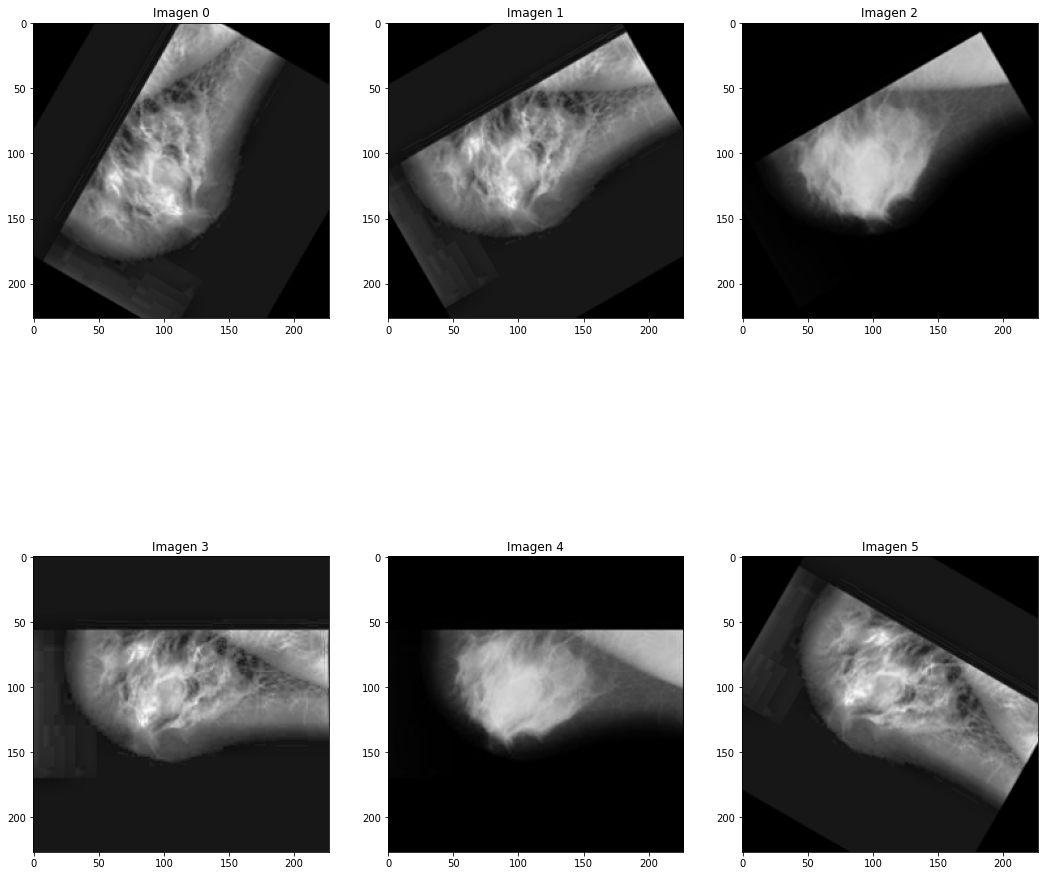

In [206]:
fig, axs = plt.subplots(2,3, figsize=(18, 18))
cont = 0
for i in range(2):
  for j in range(3):
    if cont < len(imagenes):
        axs[i,j].imshow(imagenes[(cont)])
        axs[i,j].set_title('Imagen ' + str(cont))
        cont+=1

In [207]:
# se convierte la imagen de Pillow a un array NumPy, que es compatible con OpenCV,
# y luego se convierte de RGB a BGR, que es el formato de color utilizado por OpenCV.
imagenes_opencv = []
for i in range(0,len(imagenes)):
    imagenes_opencv.append(cv.cvtColor(np.array(imagenes[i]), cv.COLOR_RGB2GRAY))


In [208]:
#Para redimensionar la imagen en Opencv
def rescaleFrame(frame, scale=1.75):

    for i in range(0,len(imagenes)):
    #[1] porque se refiere al ancho de la imagen
        width = int(frame[i].shape[1] * scale)
    #[1] porque se refiere a la altura de la imagen
        height = int(frame[i].shape[0] * scale)

        dimensions = (width,height)

        frame[i] = cv.resize(frame[i],dimensions, interpolation = cv.INTER_AREA)

    return frame

In [209]:
#Para probar la función de redimensionar
#imagenes_opencv = rescaleFrame(imagenes_opencv)


In [210]:
#FUNCION DE GRAFICAR

def graficar (filtro):
    
    fig, axs = plt.subplots(2,3, figsize=(12, 12))
    cont = 0
    for i in range(2):
        for j in range(3):
            if cont < len(imagenes):
                axs[i,j].imshow(imagenes[(cont)].filter(filtro))
                axs[i,j].set_title('Imagen' + str(cont))
                cont+=1

#************** FILTRO DETECCIÓN DE BORDES *****************************************
#Este filtro se utiliza para resaltar los bordes y las líneas de la imagen, 
#permitiendo una mejor visualización de la misma

def filtroBordes():
    graficar(ImageFilter.FIND_EDGES)
    

#************** FILTRO MEJORA DE BORDES *****************************************
#Este filtro se utiliza para resaltar los bordes y las líneas de la imagen, 
#permitiendo una mejor visualización de la misma

def filtroMejoraBordes():
    graficar(ImageFilter.EDGE_ENHANCE)


#************** FILTRO SHARPEN *****************************************
#Filtro de enfoque (Sharpen filter): Este filtro se utiliza
#para resaltar los detalles de la imagen y hacerla más nítida.

def filtroSharpen():
    graficar(ImageFilter.SHARPEN)


#************** FILTRO SMOOTH *****************************************
#Filtro de suavizado (Smoothing filter): Este filtro se utiliza
#para suavizar los bordes de la imagen, eliminando el ruido y mejorando la calidad de la misma

def filtroSmooth():
    graficar(ImageFilter.SMOOTH)


#************** FILTRO Contour *****************************************
#Filtro de Contorno: Este filtro se utiliza
#para localizar todos los contornos de la imagen

def filtroContour():
    graficar(ImageFilter.CONTOUR)

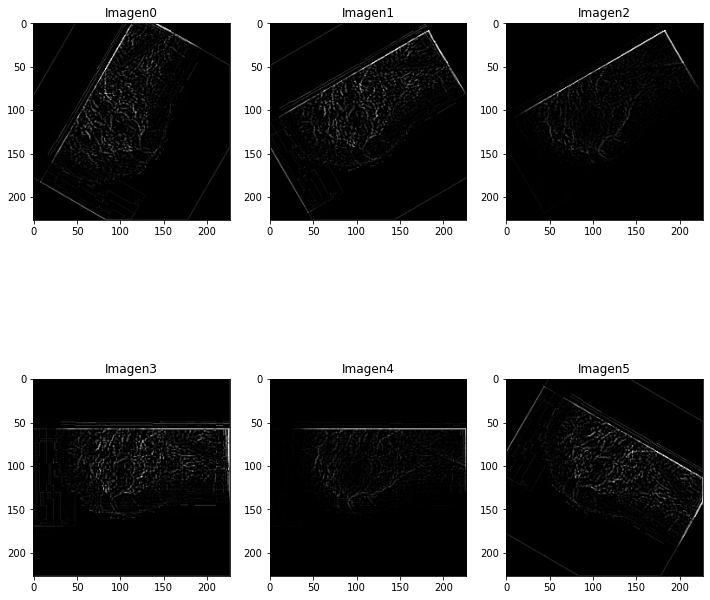

In [211]:
#Prueba Filtro 
filtroBordes()

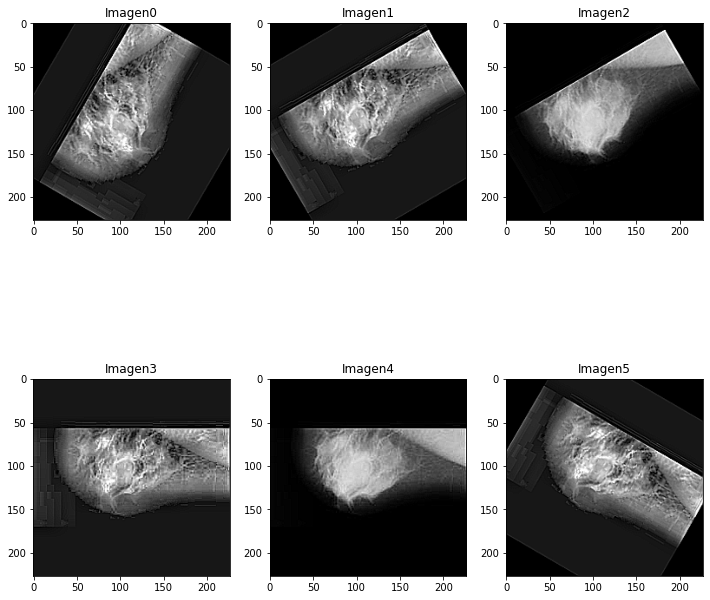

In [212]:
#Prueba Filtro 
filtroMejoraBordes()




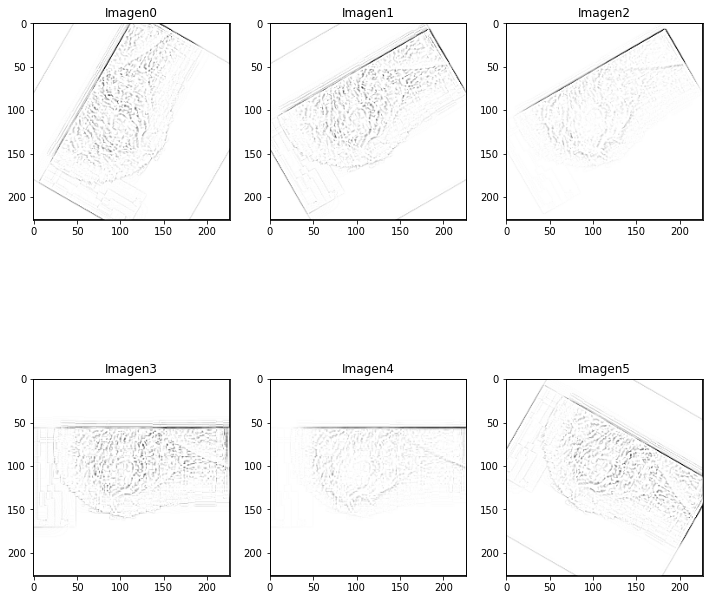

In [213]:
#Prueba Filtro 
filtroContour()

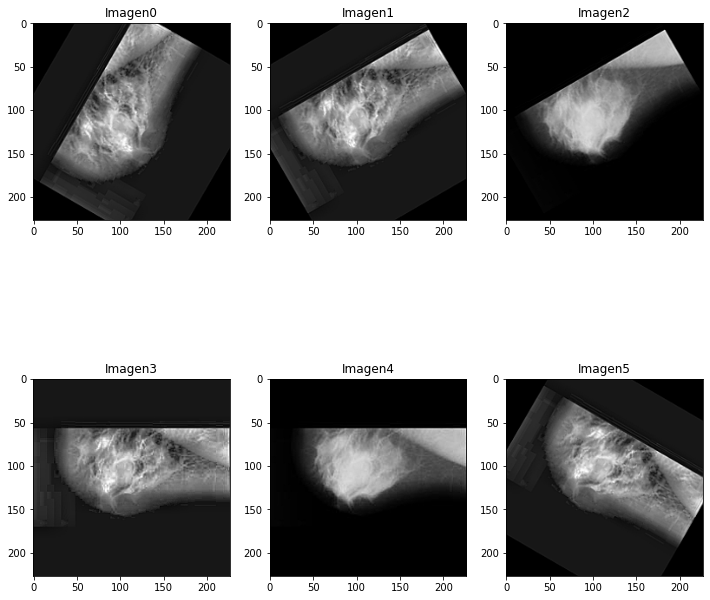

In [214]:
#Prueba Filtro 
filtroSharpen()

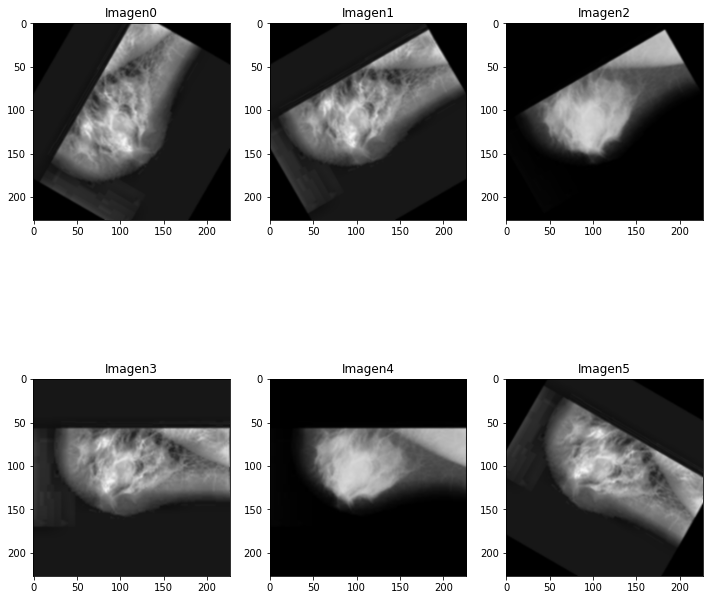

In [215]:
#Prueba Filtro 
filtroSmooth()

**PCA:** escoge el conjunto de datos originales con mayor varianza respecto a su eje, ya que de esta manera se garantiza la menor perdida de información. 
Para aplicar esta técnica se calcula la decomposición en valores singulares, se construye la matriz de covarianza y con ella la transormación lineal. Sin embargo, para esta ocasión, se hará uso de la biblioteca de sklearn, para realizar el análisis de componentes principales.



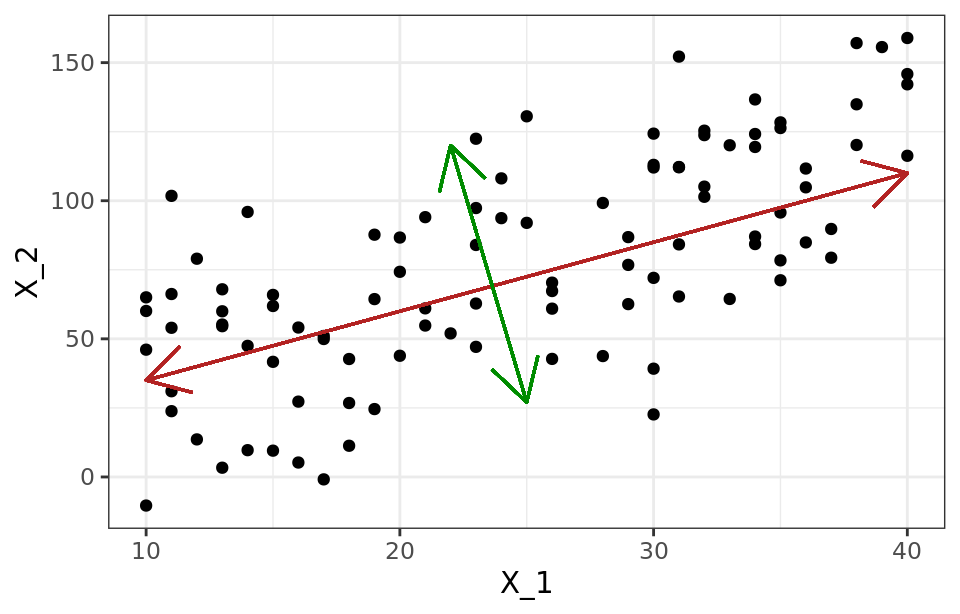

*Se divide la imagen en colores: rojo, verde y azul (RGB), para realizar el análisis de componentes particulares para cada color.*
*Pese a que las imagenes se encuentren en escala de grises, la intensidad de los píxeles será la que cambie de 0 (negro) a 255 (blanco).*

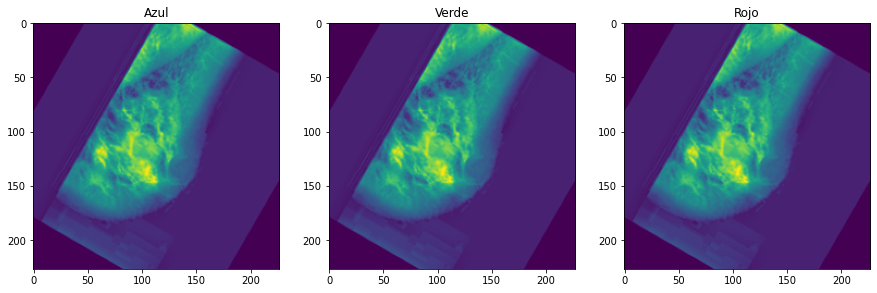

In [216]:
blue,green,red = imagenes[0].split()
# Plotting the images
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Azul")
plt.imshow(blue)
fig.add_subplot(132)
plt.title("Verde")
plt.imshow(green)
fig.add_subplot(133)
plt.title("Rojo")
plt.imshow(red)
plt.show()

*Gráfico de varianza explicada acumulada:* se traza un gráfico de la varianza explicada acumulada en función del número de componentes. Esto permitirá visualizar cuánta varianza se conserva a medida que se aumenta el número de componentes.

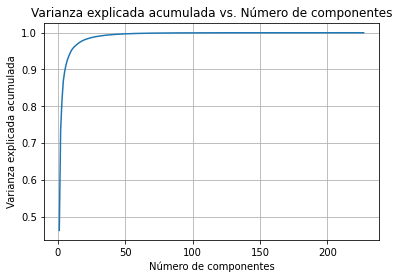

In [217]:

im1 = Image.open("Photos/mdb001 (2).png")
# Ajustar PCA a los datos
pca = PCA()
pca.fit(im1)

# Obtener la varianza explicada acumulada
varianza_explicada_acumulada = np.cumsum(pca.explained_variance_ratio_)

# Graficar la varianza explicada acumulada
plt.plot(range(1, len(varianza_explicada_acumulada) + 1), varianza_explicada_acumulada)
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.title('Varianza explicada acumulada vs. Número de componentes')
plt.grid(True)
plt.show()

 **Posteriormente**, se realizan pruebas con la primera imagen, para encontrar cual es el menor número de componentes para mantener una varianza de al menos el 90%.

In [218]:
im1 = Image.open("Photos/mdb001 (2).png")
# Crear una instancia del objeto PCA
pca = PCA()

#Ajustar PCA a los datos
pca.fit(im1)

# Especificar la proporción de varianza deseada (por ejemplo, 0.9 para el 90%)
proportion_varianza_deseada = 0.9

# Encontrar el número mínimo de componentes necesarios para alcanzar la proporción de varianza deseada
num_componentes = np.argmax(varianza_explicada_acumulada >= proportion_varianza_deseada) + 1

print("Número de componentes necesarios:", num_componentes)


Número de componentes necesarios: 6


In [219]:
#Se puede indicar el "0.9" permite que se encuentren componentes principales
#que expliquen el 90% de la varianza de los pixeles

pca = PCA(6)
blue, green, red = imagenes[0].split()

pca.fit(blue)
trans_pca_azul = pca.transform(blue)
pca.fit(green)
trans_pca_verde = pca.transform(green)

pca.fit(red)
trans_pca_rojo = pca.transform(red)

print(f"Varianza_Azul: {sum(pca.explained_variance_ratio_)}")
print(f"Varianza_Verde: {sum(pca.explained_variance_ratio_)}")
print(f"Varianza_Rojo: {sum(pca.explained_variance_ratio_)}")

Varianza_Azul: 0.9124895529920497
Varianza_Verde: 0.9124895529920497
Varianza_Rojo: 0.9124895529920497


 *Se ajustan, transforman y reconstruyen las imagenes, teniendo en cuenta que el menor número de componentes necesarios para obtener una varianza aceptable de los datos es de, aproximadamente 6 componentes.*
*Es importante recordar, que luego de reducir las dimensiones de las imagenes se debe reconstruir la imagen, para ello se realiza la transformación inversa y se unen los tres colores (merge).*

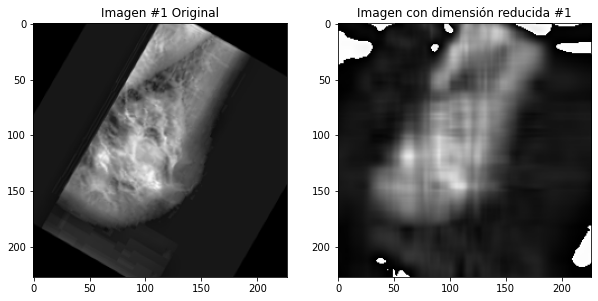

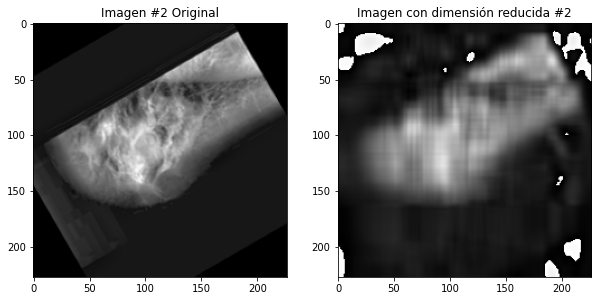

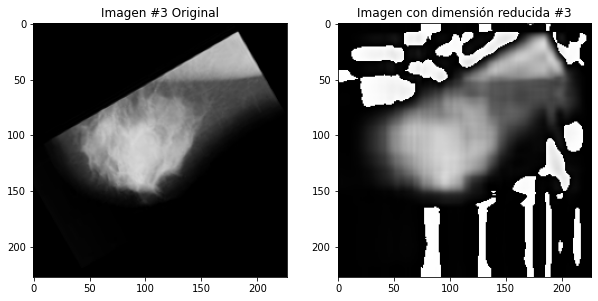

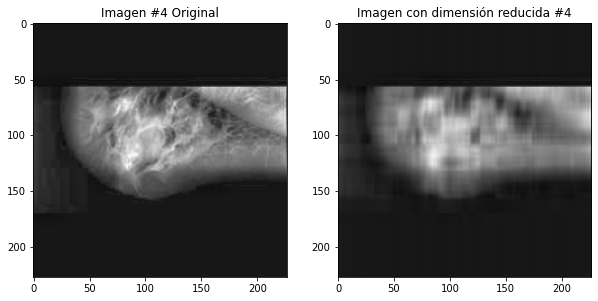

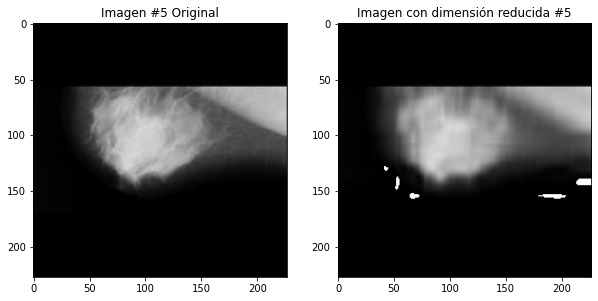

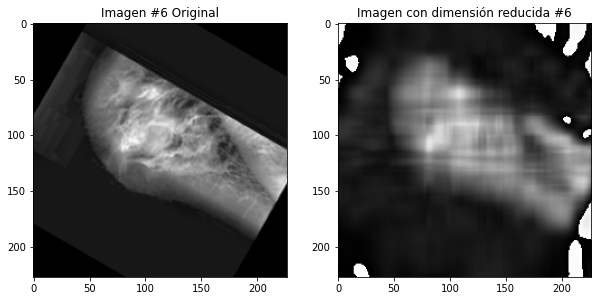

In [220]:
cont=0
for j in range(len(imagenes)):
  cont += 1
  pca = PCA(6)
  blue,green,red = imagenes[j].split()
  pca.fit(blue)
  trans_pca_azul = pca.transform(blue)
  pca.fit(green)
  trans_pca_verde = pca.transform(green)
  pca.fit(red)
  trans_pca_rojo = pca.transform(red)

  pixelesA = pca.inverse_transform(trans_pca_azul)
  pixelesV = pca.inverse_transform(trans_pca_verde)
  pixelesR = pca.inverse_transform(trans_pca_rojo)

  img_reduced = (cv.merge((pixelesR, pixelesA,pixelesV))).astype(np.uint8)
  
  fig = plt.figure(figsize = (10, 7.2)) 
  fig.add_subplot(121)
  titulo1 = "Imagen #" + str(cont)+" Original"
  titulo2 = "Imagen con dimensión reducida #" + str(cont)
  plt.title(titulo1)
  plt.imshow(imagenes[j])

  fig.add_subplot(122)
  plt.title(titulo2)
  plt.imshow(img_reduced)
  plt.show()

*A continuación, se aplicará para cada una de las imagenes, el análisis de componentes principales, para 10, 20, 30 y 40 componentes, con el fin de visualizar, como mejora la imagen a medida que aumenta el número de componentes.*

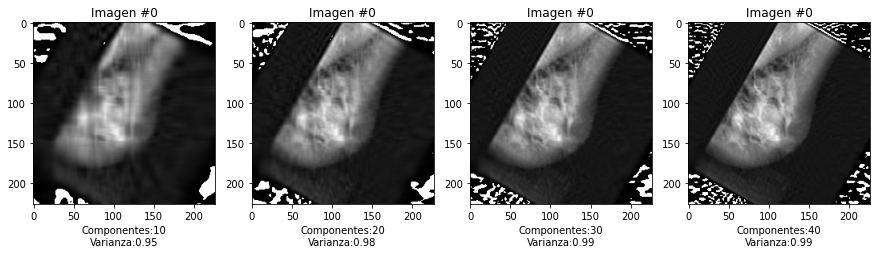

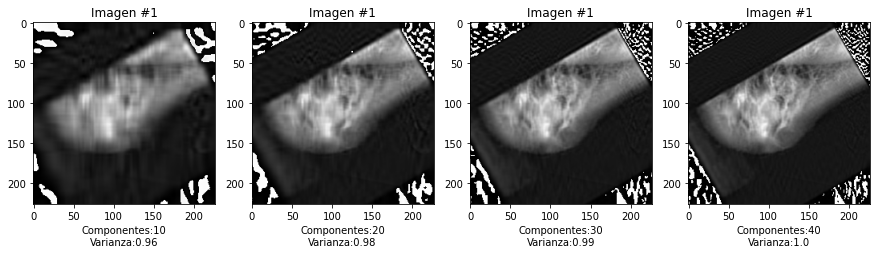

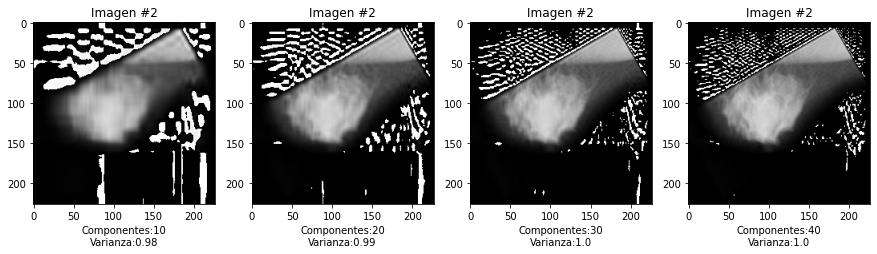

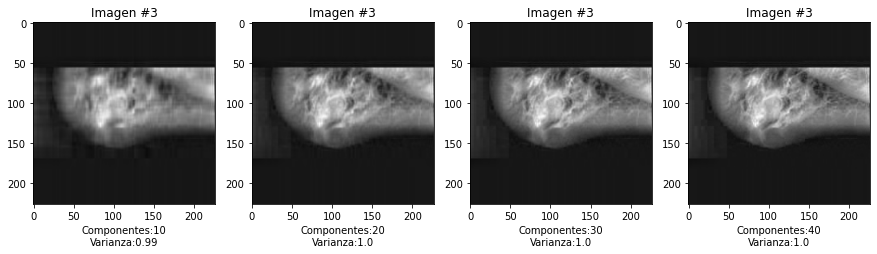

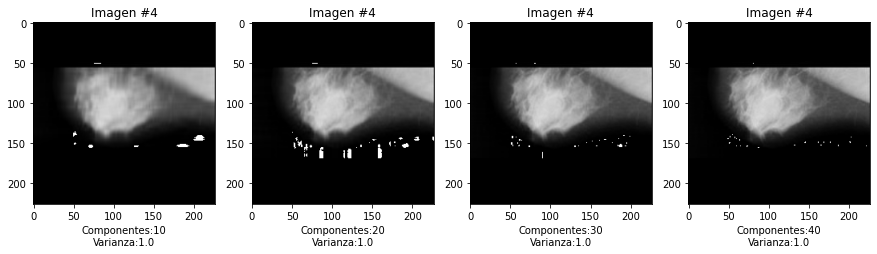

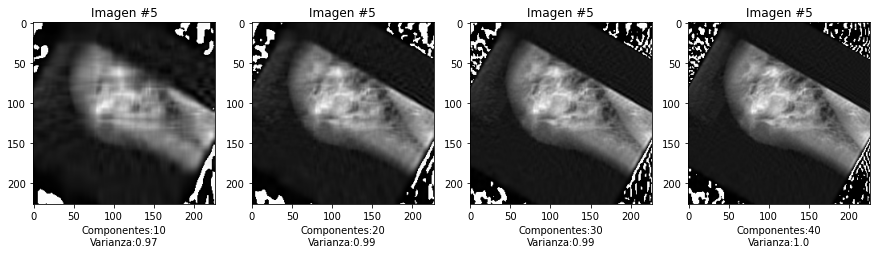

In [221]:
cont = 0
for j in range(len(imagenes)):
  fig, axs = plt.subplots(1,4, figsize=(15, 15))
  for i in range(10, 41, 10):
    pca = PCA(i)
    blue,green,red = imagenes[j].split()
    red_transformed = pca.fit_transform(red)
    red_inverted = pca.inverse_transform(red_transformed)
    green_transformed = pca.fit_transform(green)
    green_inverted = pca.inverse_transform(green_transformed)
    blue_transformed = pca.fit_transform(blue)
    blue_inverted = pca.inverse_transform(blue_transformed)
    img_compressed = (cv.merge((red_inverted, red_inverted, red_inverted))).astype(np.uint8)
    axs[cont].imshow(img_compressed)
    axs[cont].set_title('Imagen #' + str(j))
    axs[cont].set_xlabel('Componentes:' + str(i)+'\n'+"Varianza:"
                        + str(round(sum(pca.explained_variance_ratio_), 2)))
    cont+=1
  cont=0

**Conclusiones:**  
* Se evidencia que usando 6 componentes, se obtiene un 91% de varianza y con 30 componentes, se obtiene un 99% de varianza. Aunque se reconocen algunas imágenes a partir de 20 a 30 componentes. 

* Se comprueba que a medida que aumentan los componentes se obtiene una mejor calidad de la imagen.

* La reconstrucción de imagenes tras reducir la dimensionalidad, genera perdida de información.

* PCA es una herramienta importante para reducir dimensiones y visualizar con mayor facilidad el comportamiento de los componentes.

* PCA, además de reducir dimensiones, permite comprimir y reconstruir imagenes 